# Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

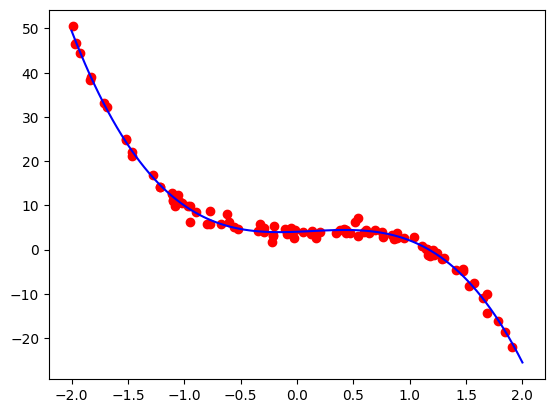

In [ ]:
#Generating random 2D array
x =  4*np.random.rand(100,1) - 2
#Generating values of y which follow a specific curve
y = 4 + 1*x + 2*x**2 - 5*x**3 + np.random.randn(100,1)

#Transforming values of x into a 2D array with values of coefficients of x
poly_features = PolynomialFeatures(degree = 3, include_bias = False)
x_poly = poly_features.fit_transform(x)

reg = LinearRegression()
reg.fit(x_poly, y)

a0 = reg.intercept_[0]
a1 = reg.coef_[0][0]
a2 = reg.coef_[0][1]
a3 = reg.coef_[0][2]
#Plotting the graph
plt.figure()
plt.plot(x,y,'ro')
x_line = np.linspace(-2,2,100)
y_line = a0 + a1*x_line + a2*x_line**2 + a3*x_line**3
plt.plot(x_line, y_line,'b')

# Bias - Variance Tradeoff

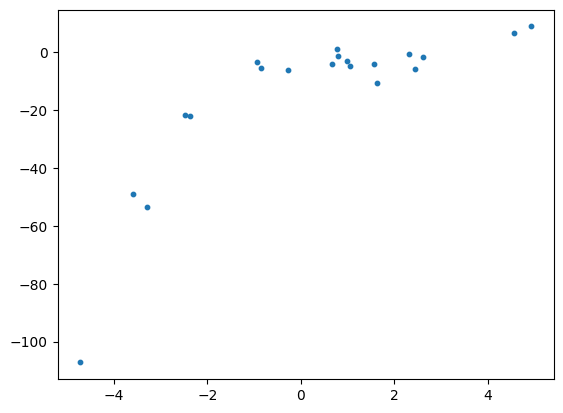

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Graph with data points
np.random.seed(0)
#Setting random.seed(0) generates a set of random numbers , but the same numbers are generated everytime the code is run
x = 2 - 3 * np.random.normal(0, 1, 20)
#np.random.norma(0,1,20 generates array with 20 elements with mean 0 , std deviation as 1)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

Now let's try linear regression on this

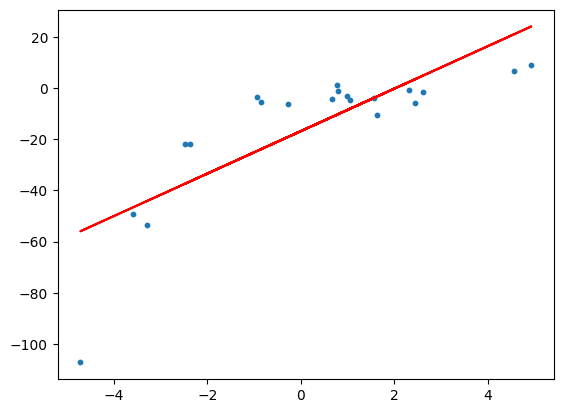

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()


We can see that the data is unable to capture the patterns in the curve, so this is a case of under-fitting. Let's try and add an \($x^2$\)
to this model to increase it's complexity.

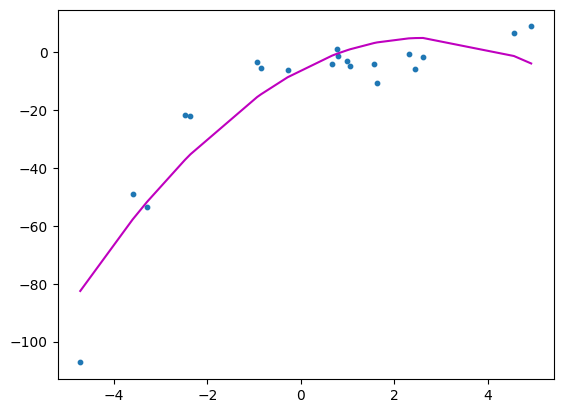

In [ ]:
import operator
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

Now, let's again try and add an \($x^4$\) feature too

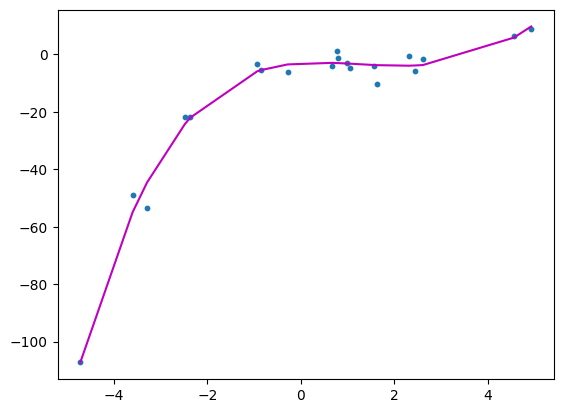

In [ ]:

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

Let's increase the power to 10 now!

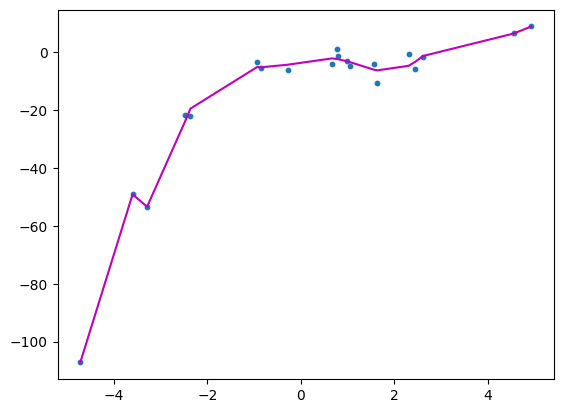

In [ ]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)


plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

As obseved , the algorithm is starting to plot all the datapoints in it's graph as the powers are increasing , thereby increasing variance

Let's try 20 ?

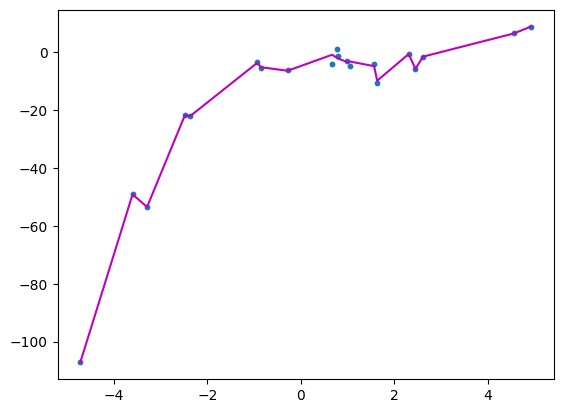

In [ ]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

Now this is a classic example of overfitting , the model has learnt the training model really good , fits nearly all the points . But will fail miserabely in new datapoints because it has learnt unecessary pattern in it

Also , changing the training data slightly might give rise to a completely different function , thereby rendering the output completely useless !